In [1]:
import numpy as np

In [12]:
def sigmoid(x,a=1):
    return 1/(1+np.exp(-a*x))

def relu(x):
    return np.maximum(0,x)

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def threshold(x):
    return np.where(x>0,1,0)

def leaky_relu(x):
    return np.where(x>0,x,0.01*x)


In [17]:
l=[sigmoid,relu,leaky_relu,tanh,threshold]
for i in l:
    print(i.__name__.capitalize(),":",sep='')
    print(i(1))



Sigmoid:
0.7310585786300049
Relu:
1
Leaky_relu:
1.0
Tanh:
0.7615941559557649
Threshold:
1


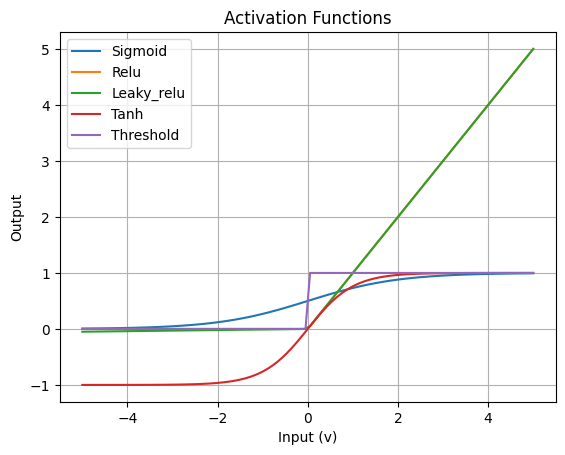

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)

for i in l:
    y = i(x)
    plt.plot(x, y, label=i.__name__.capitalize())

plt.xlabel('Input (v)')
plt.ylabel('Output')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)
plt.show()



In [23]:
import random
from math import exp

def sigmoid(x):
  return 1 / (1 + exp(-x))

class Neuron:
  def __init__(self, num_inputs, activation_function=sigmoid):
    self.weights = [random.random() for _ in range(num_inputs)]
    self.bias = random.random()
    self.activation_function = activation_function

  def forward(self, inputs):
    weighted_sum = sum([inputs[i] * self.weights[i] for i in range(len(inputs))]) + self.bias
    return self.activation_function(weighted_sum)

class XOR_Network:
  def __init__(self):
    self.layer1_neuron1 = Neuron(2)
    self.layer1_neuron2 = Neuron(2)
    self.layer2_neuron = Neuron(2)

  def forward(self, inputs):
    layer1_output1 = self.layer1_neuron1.forward(inputs)
    layer1_output2 = self.layer1_neuron2.forward(inputs)
    layer2_output = self.layer2_neuron.forward([layer1_output1, layer1_output2])
    return layer2_output

network = XOR_Network()

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
expected_outputs = [0, 1, 1, 0]

for i in range(len(inputs)):
  output = network.forward(inputs[i])
  print(f"Input: {inputs[i]}, Output: {output:.4f}, Expected: {expected_outputs[i]}")

Input: [0, 0], Output: 0.8230, Expected: 0
Input: [0, 1], Output: 0.8466, Expected: 1
Input: [1, 0], Output: 0.8528, Expected: 1
Input: [1, 1], Output: 0.8674, Expected: 0
